In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
class HelperFunctions:
    @staticmethod
    def covariance_matrix2x2d(sigma1, sigma2, sigma12):
        return np.array([[sigma1**2, sigma12], [sigma12, sigma2**2]])
    
    @staticmethod
    def column_matrix(*args):
        return np.expand_dims(np.array(args), axis=0).T

# Problem 1

In [3]:
def build_confusion_matrix(preds, targ):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(preds.shape[0]):
        if preds[i] == targ[i]:
            if preds[i] == 1:
                tp += 1
            else:
                tn += 1
        else:
            if preds[i] == 1:
                fp += 1
            else:
                fn += 1
    return tp, tn, fp, fn

## Using data from problem 2 of lab-2

In [4]:
def describe_result(tp, tn, fp, fn, total):
    accuracy = (tp+tn)/total
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1score = (2*precision*recall) / (precision+recall)
    return accuracy, precision, recall, f1score

In [5]:
class Problem2:
    n1 = 250
    n2 = 500
    m1 = np.array([0, 0, 0, 0, 0])
    m2 = np.array([0, 0, 0, 0, 0])
    s1 = np.array([ \
        [0.8, 0.2, 0.1, 0.05, 0.01],
        [0.2, 0.7, 0.1, 0.03, 0.02],
        [0.1, 0.1, 0.8, 0.02, 0.01],
        [0.05, 0.03, 0.02, 0.9, 0.01],
        [0.01, 0.02, 0.01, 0.01, 0.8] \
    ])
    s2 = np.array([ \
        [0.9, 0.1, 0.05, 0.02, 0.01],
        [0.1, 0.8, 0.1, 0.02, 0.02],
        [0.05, 0.1, 0.7, 0.02, 0.01],
        [0.02, 0.02, 0.02, 0.6, 0.02],
        [0.01, 0.02, 0.01, 0.02, 0.7] \
    ])

In [6]:
x1 = np.random.multivariate_normal(Problem2.m1, Problem2.s1, Problem2.n1)
x2 = np.random.multivariate_normal(Problem2.m2, Problem2.s2, Problem2.n1)
print(x1.shape, x2.shape)

(250, 5) (250, 5)


In [7]:
class BayesClassifier:
    def __init__(self, data, probs):
        self.data = data
        self.probs = probs
        self.mean = list()
        self.vars = list()
        for class_data in self.data:
            self.mean.append(np.mean(class_data, axis=0))
            self.vars.append(np.var(class_data, axis=0))
        self.n_classes = len(self.mean)
    
    def predict(self, data_pts):
        preds = list()
        for data_pt in data_pts:
            probs = list()
            for c in range(self.n_classes):
                prob = 1
                for f in range(data_pt.shape[0]):
                    prob *= 1/(2*np.pi*(self.vars[c][f]**2))
                    prob *= np.exp(-1*((data_pt[f]-self.mean[c][f])**2)/(2*self.vars[c][f]**2))
                prob *= self.probs[c]
                probs.append(prob)
            preds.append(np.argmax(probs))
        return np.expand_dims(np.array(preds), axis=1)

    def accuracy(self, data_pts, data_label):
        n = data_pts.shape[0]
        preds = self.predict(data_pts)
        return (preds==data_label).sum() / n

In [8]:
bc = BayesClassifier([x1, x2], [0.5, 0.5])

In [9]:
# building testset
test_data = np.vstack(
    (
        np.random.multivariate_normal(Problem2.m1, Problem2.s1, Problem2.n2),
        np.random.multivariate_normal(Problem2.m2, Problem2.s2, Problem2.n2)
    )
)

test_label = np.vstack(
    (
        np.zeros((500, 1)),
        np.ones((500, 1))
    )
)

print(test_data.shape)
print(test_label.shape)

(1000, 5)
(1000, 1)


In [10]:
preds = bc.predict(test_data)
tp, tn, fp, fn = build_confusion_matrix(preds, test_label)
total = test_data.shape[0]
accuracy, precision, recall, f1score = describe_result(tp, tn, fp, fn, total)

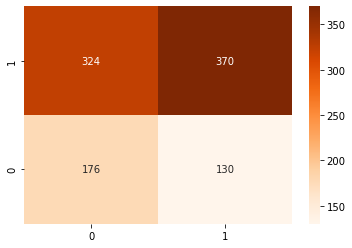

In [11]:
columns = range(2)
cnfs_mat = confusion_matrix(preds, test_label)
df = pd.DataFrame(cnfs_mat, columns=columns, index=columns)
ax = sn.heatmap(df, cmap='Oranges', annot=True, fmt='g')
ax.invert_yaxis()

In [12]:
print(f'true positive: {tp}')
print(f'true negative: {tn}')
print(f'false positive: {fp}')
print(f'false negative: {fn}')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1score: {f1score}')

true positive: 370
true negative: 176
false positive: 324
false negative: 130
accuracy: 0.546
precision: 0.5331412103746398
recall: 0.74
f1score: 0.6197654941373535


## Using data from problem 3 of lab-2

In [13]:
class Problem3:
    p1 = 0.6
    p2 = 0.4
    m1 = np.array([0, 0])
    m2 = np.array([1, 2])
    s = np.array(
        [
            [0.8, 0.2],
            [0.2, 0.8]
        ]
    )
    n1 = 500
    n2 = 1500

In [14]:
train_data = list()
train_data.append(np.random.multivariate_normal(Problem3.m1, Problem3.s, Problem3.n1))
train_data.append(np.random.multivariate_normal(Problem3.m2, Problem3.s, Problem3.n1))

test_data = np.vstack(
    (
        np.random.multivariate_normal(Problem3.m1, Problem3.s, Problem3.n2),
        np.random.multivariate_normal(Problem3.m2, Problem3.s, Problem3.n2)
    )
)
test_label = np.vstack(
    (
        np.zeros((Problem3.n2, 1)),
        np.ones((Problem3.n2, 1))
    )
)

In [15]:
bc = BayesClassifier(train_data, [Problem3.p1, Problem3.p2])

In [16]:
preds = bc.predict(test_data)
tp, tn, fp, fn = build_confusion_matrix(preds, test_label)
total = test_data.shape[0]
accuracy, precision, recall, f1score = describe_result(tp, tn, fp, fn, total)

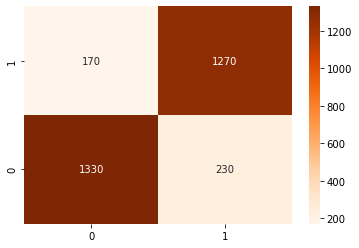

In [17]:
columns = range(2)
cnfs_mat = confusion_matrix(preds, test_label)
df = pd.DataFrame(cnfs_mat, columns=columns, index=columns)
ax = sn.heatmap(df, cmap='Oranges', annot=True, fmt='g')
ax.invert_yaxis()

In [18]:
print(f'true positive: {tp}')
print(f'true negative: {tn}')
print(f'false positive: {fp}')
print(f'false negative: {fn}')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1score: {f1score}')

true positive: 1270
true negative: 1330
false positive: 170
false negative: 230
accuracy: 0.8666666666666667
precision: 0.8819444444444444
recall: 0.8466666666666667
f1score: 0.8639455782312925


## Using data from problem 4 of lab-2

In [19]:
class Config:
    iris_datapath = Path('../data/iris.data')

In [20]:
iris_dataframe = pd.read_csv(Config.iris_datapath, 
                             names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [21]:
class_encode = {
    'Iris-virginica': 0,
    'Iris-setosa': 1,
    'Iris-versicolor': 2
}

In [22]:
iris_dataframe['class'] = [class_encode[i] for i in iris_dataframe['class']]

In [23]:
train_data, test_data = train_test_split(iris_dataframe, test_size=0.5, shuffle=True, stratify=iris_dataframe['class'])
train_data.reset_index(drop=False, inplace=True)
test_data.reset_index(drop=False, inplace=True)

In [24]:
class_data = [
    train_data[train_data['class']==0].reset_index(drop=True),
    train_data[train_data['class']==1].reset_index(drop=True),
    train_data[train_data['class']==2].reset_index(drop=True)
]
for df in class_data:
    df.drop(columns=['class'], inplace=True)
probs = [0.33, 0.33, 0.33]

In [25]:
bc = BayesClassifier(class_data, probs)

In [26]:
preds = bc.predict(test_data.drop(columns=['class']).to_numpy())
test_label = np.expand_dims(test_data['class'].to_numpy(), axis=1)
tp, tn, fp, fn = build_confusion_matrix(preds, test_label)
total = test_data.shape[0]
accuracy, precision, recall, f1score = describe_result(tp, tn, fp, fn, total)

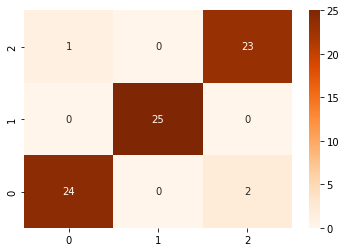

In [27]:
columns = range(3)
cnfs_mat = confusion_matrix(preds, test_label)
df = pd.DataFrame(cnfs_mat, columns=columns, index=columns)
ax = sn.heatmap(df, cmap='Oranges', annot=True, fmt='g')
ax.invert_yaxis()

In [28]:
print(f'true positive: {tp}')
print(f'true negative: {tn}')
print(f'false positive: {fp}')
print(f'false negative: {fn}')
print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1score: {f1score}')

true positive: 25
true negative: 47
false positive: 0
false negative: 3
accuracy: 0.96
precision: 1.0
recall: 0.8928571428571429
f1score: 0.9433962264150945


# Problem 2

In [29]:
# getting the lab-2 question-2 data and 
# creating bayes classfier model object
x1 = np.random.multivariate_normal(Problem2.m1, Problem2.s1, Problem2.n1)
x2 = np.random.multivariate_normal(Problem2.m2, Problem2.s2, Problem2.n1)
bc = BayesClassifier([x1, x2], [0.5, 0.5])

## for minimum error probability

$$
p(x_{j}|w_{i}) = \frac{1}{\sqrt{2\pi\sigma_{ij}^{2}}}e^{-\frac{x[j]-m_{ij}^{2}}{2\sigma_{ij}^{2}}}
$$
We need $p(x_{i}|w_{1}) = p(x_{i}|w_{2})$
$$
\Rightarrow \frac{1}{\sqrt{2\pi\sigma_{1j}^{2}}}e^{-\frac{x[j]-m_{1j}^{2}}{2\sigma_{1j}^{2}}} = \frac{1}{\sqrt{2\pi\sigma_{2j}^{2}}}e^{-\frac{x[j]-m_{2j}^{2}}{2\sigma_{2j}^{2}}}
$$
$$
\Rightarrow \frac{\sqrt{2\pi\sigma_{1j}^{2}}}{\sqrt{2\pi\sigma_{2j}^{2}}} = \frac{e^{-\frac{x[j]-m_{1j}^{2}}{2\sigma_{1j}^{2}}}}{e^{-\frac{x[j]-m_{2j}^{2}}{2\sigma_{2j}^{2}}}}
$$
$$
\Rightarrow \frac{\sigma_{1j}}{\sigma_{2j}} = e^{-\frac{x[j]-m_{1j}^{2}}{2\sigma_{1j}^{2}}+\frac{x[j]-m_{2j}^{2}}{2\sigma_{2j}^{2}}}
$$
$$
\Rightarrow x[j] = \frac{2\sigma_{1j}^{2}\sigma_{2j}^{2}ln\frac{\sigma_{1j}}{\sigma_{2j}} - \sigma_{2j}^{2}m_{1j}^{2} + \sigma_{1j}^{2}m_{2j}^{2}}{\sigma_{1j}^{2}-\sigma_{2j}^{2}}
$$

In [30]:
# using the above evaluation
feature_cnt = 5
x0 = np.zeros(feature_cnt)

for j in range(feature_cnt):
    sigma1j = bc.vars[0][j]
    sigma2j = bc.vars[1][j]
    mu1j = bc.mean[0][j]
    mu2j = bc.mean[1][j]
    numr = 2*np.power(sigma1j, 2)*np.power(sigma2j, 2)*np.log(sigma1j/sigma2j) \
            - np.power(sigma2j*mu1j, 2)*np.power(sigma1j*mu2j, 2)
    dnmr = np.power(sigma1j, 2)-np.power(sigma2j, 2)
    x0[j] = numr/dnmr

print(f'Threshold x0: {x0}')

Threshold x0: [0.67982945 0.47462382 0.69137548 0.4170194  0.51393927]


## for minimum risk

$$
p(x_{j}|w_{i}) = \frac{1}{\sqrt{2\pi\sigma_{ij}^{2}}}e^{-\frac{x[j]-m_{ij}^{2}}{2\sigma_{ij}^{2}}}
$$
We need $\lambda_{12}p(x_{i}|w_{1}) = \lambda_{12}p(x_{i}|w_{2})$
$$
\Rightarrow \frac{\lambda_{12}}{\sqrt{2\pi\sigma_{1j}^{2}}}e^{-\frac{x[j]-m_{1j}^{2}}{2\sigma_{1j}^{2}}} = \frac{\lambda_{21}}{\sqrt{2\pi\sigma_{2j}^{2}}}e^{-\frac{x[j]-m_{2j}^{2}}{2\sigma_{2j}^{2}}}
$$
$$
\Rightarrow \frac{\lambda_{21}\sqrt{2\pi\sigma_{1j}^{2}}}{\lambda_{12}\sqrt{2\pi\sigma_{2j}^{2}}} = \frac{e^{-\frac{x[j]-m_{1j}^{2}}{2\sigma_{1j}^{2}}}}{e^{-\frac{x[j]-m_{2j}^{2}}{2\sigma_{2j}^{2}}}}
$$
$$
\Rightarrow \frac{\lambda_{21}\sigma_{1j}}{\lambda_{12}\sigma_{2j}} = e^{-\frac{x[j]-m_{1j}^{2}}{2\sigma_{1j}^{2}}+\frac{x[j]-m_{2j}^{2}}{2\sigma_{2j}^{2}}}
$$
$$
\Rightarrow x[j] = \frac{2\sigma_{1j}^{2}\sigma_{2j}^{2}ln\frac{\lambda_{21}\sigma_{1j}}{\lambda_{12}\sigma_{2j}} - \sigma_{2j}^{2}m_{1j}^{2} + \sigma_{1j}^{2}m_{2j}^{2}}{\sigma_{1j}^{2}-\sigma_{2j}^{2}}
$$

In [31]:
# using the above evaluation
feature_cnt = 5
x0 = np.zeros(feature_cnt)

for j in range(feature_cnt):
    sigma1j = bc.vars[0][j]
    sigma2j = bc.vars[1][j]
    lambda12 = 0.5
    lambda21 = 1
    mu1j = bc.mean[0][j]
    mu2j = bc.mean[1][j]
    numr = 2*np.power(sigma1j, 2)*np.power(sigma2j, 2)*np.log(lambda21*sigma1j/lambda12*sigma2j) \
            - np.power(sigma2j*mu1j, 2)*np.power(sigma1j*mu2j, 2)
    dnmr = np.power(sigma1j, 2)-np.power(sigma2j, 2)
    x0[j] = numr/dnmr

print(f'Threshold x0: {x0}')

Threshold x0: [-4.7758382  -0.81794062 -1.11170305 -0.14863563  0.06985313]


# Problem 3

In [32]:
# getting the lab-2 problem-3 test data
test_data = np.vstack(
    (
        np.random.multivariate_normal(Problem3.m1, Problem3.s, Problem3.n2),
        np.random.multivariate_normal(Problem3.m2, Problem3.s, Problem3.n2)
    )
)

In [33]:
p1 = (1/np.sqrt(1.6*np.pi)) * np.exp(-np.power(test_data[:,0], 2))
l1 = 0.6 + p1*0.4
print(f'l1: {l1}')

l1: [0.76890686 0.72435318 0.77834204 ... 0.6057036  0.60081068 0.74862785]


In [34]:
p2 = (1/np.sqrt(0.4*np.pi)) * np.exp(-np.power(test_data[:,0]-1, 2))
l2 = 0.7*p2*0.6
print(f'l2: {l2}')

l2: [0.08172083 0.02888851 0.14336105 ... 0.18020585 0.06517315 0.04884373]
